<a href="https://colab.research.google.com/github/shikharmay7/minor-project/blob/master/minorCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
base_path = "/content/drive/My Drive/Datasets/minor_sem6train/"
val_path = "/content/drive/My Drive/Datasets/minor_sem6val/"

In [7]:
dir_list = os.listdir(base_path)
len(dir_list)

4

In [8]:
def getListOfFiles(dirName):
# create a list of file and sub directories 
# names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
# Iterate over all the entries
    for entry in listOfFile:
# Create full path
        fullPath = os.path.join(dirName, entry)
# If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles  

In [9]:
listOfFiles = getListOfFiles(base_path)

In [10]:
listOfFiles.sort()

In [11]:
listOfFiles

['/content/drive/My Drive/Datasets/minor_sem6train/aman/amanLeftRight_01/scene00001.png',
 '/content/drive/My Drive/Datasets/minor_sem6train/aman/amanLeftRight_01/scene00002.png',
 '/content/drive/My Drive/Datasets/minor_sem6train/aman/amanLeftRight_01/scene00003.png',
 '/content/drive/My Drive/Datasets/minor_sem6train/aman/amanLeftRight_01/scene00004.png',
 '/content/drive/My Drive/Datasets/minor_sem6train/aman/amanLeftRight_01/scene00005.png',
 '/content/drive/My Drive/Datasets/minor_sem6train/aman/amanLeftRight_01/scene00006.png',
 '/content/drive/My Drive/Datasets/minor_sem6train/aman/amanLeftRight_01/scene00007.png',
 '/content/drive/My Drive/Datasets/minor_sem6train/aman/amanLeftRight_01/scene00008.png',
 '/content/drive/My Drive/Datasets/minor_sem6train/aman/amanLeftRight_01/scene00009.png',
 '/content/drive/My Drive/Datasets/minor_sem6train/aman/amanLeftRight_01/scene00010.png',
 '/content/drive/My Drive/Datasets/minor_sem6train/aman/amanLeftRight_01/scene00011.png',
 '/content

In [12]:
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16, ResNet50
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D, Input, BatchNormalization, GRU
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D, Conv1D, Activation, TimeDistributed
from keras import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [13]:
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    k = 100
    for i in range(0,4):
        for j in range(0,4):
            image = load_img(X[k], target_size=(224, 224))
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(image)
            k = k+1
    # show the plot
    plt.show()

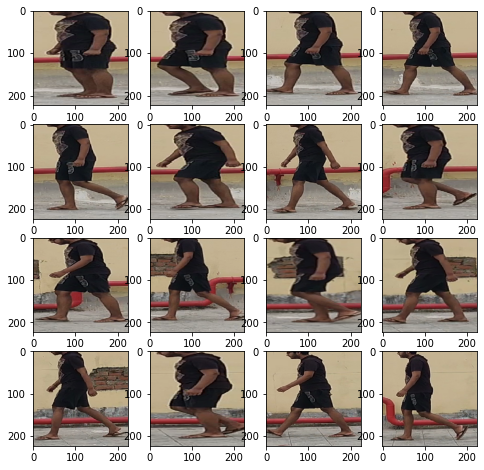

In [14]:
show_imgs(listOfFiles)

In [15]:
val_dir = getListOfFiles(val_path)

In [16]:
val_dir.sort()

In [17]:
val_dir

['/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00001.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00002.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00003.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00004.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00005.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00006.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00007.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00008.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00009.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00010.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00011.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00012.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene00013.png',
 '/content/drive/My Drive/Datasets/minor_sem6val/aman1/scene0001

In [18]:
model = VGG16(weights="imagenet", include_top=False) #remove the dense layers
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [19]:
def create_features(dataset, pre_model):
 
    x_scratch = []
 
    # loop over the images
    for imagePath in dataset:
 
        # load the input image and image is resized to 224x224 pixels 
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)
 
    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 512))
    return x, features, features_flatten

In [20]:
train_x, train_features, train_features_flatten = create_features(listOfFiles, model)
val_x, val_features, val_features_flatten = create_features(val_dir, model)

print(train_x.shape, train_features.shape, train_features_flatten.shape)
print(val_x.shape, val_features.shape, val_features_flatten.shape)

(400, 224, 224, 3) (400, 7, 7, 512) (400, 25088)
(100, 224, 224, 3) (100, 7, 7, 512) (100, 25088)


In [21]:
label_dict = {0 : 'Aman', 1: 'Ankit', 2: 'Avinash', 3: 'Shikhar'}

In [24]:
y_train = []
y_val = []

for i in range(4):
  for j in range(100):
    y_train.append(i)

for i in range(4):
  for j in range(25):
    y_val.append(i)

In [25]:
#trying a conventional classifiers
#RandomForestClassifier
import sklearn
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_features_flatten, y_train)


y_pred_train = rf.predict(train_features_flatten)
# predictions for test
y_pred_val = rf.predict(val_features_flatten)
    # training metrics
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= y_train, y_pred= y_pred_train))
    
    # test data metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= y_val, y_pred= y_pred_val))

Training metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Test data metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      0.92      0.96        25
           3       0.93      1.00      0.96        25

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

